In [200]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [201]:
# Set the theme in Seaborn
sns.set_theme(style="darkgrid", font="Arial", font_scale=1.5)

# Set the font size in Matplotlib
plt.rcParams.update({'font.size': 15})

# Set the background style in Matplotlib
plt.rcParams['axes.facecolor'] = 'black'

matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [202]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [203]:
#Read the CSV file and store it in the 'df' variable
df = pd.read_csv("predictive_maintenance.csv")

#Drop the 'Unique ID' and 'Product ID' columns from the dataframe
df = df.drop(["UDI","Product ID"], axis=1)

#Select a random sample of 10 rows from the dataframe
df.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
4982,L,303.7,313.0,1811,24.3,209,0,No Failure
9741,L,298.9,310.1,1495,42.9,175,0,No Failure
6775,L,301.2,310.6,1670,30.0,40,0,No Failure
8612,L,297.5,308.4,1441,44.5,4,0,No Failure
1818,M,298.1,307.7,1435,40.9,147,0,No Failure
7582,H,300.4,311.2,1489,45.3,180,0,No Failure
9658,L,299.0,309.9,1548,34.5,214,0,No Failure
6201,M,301.0,310.9,1510,44.5,66,0,No Failure
3664,M,302.3,311.7,1685,30.8,130,0,No Failure
9671,L,299.0,310.2,1412,44.1,246,0,No Failure


In [204]:
df.isnull().sum() #check missing value

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [205]:
## Converting temperature in centigrate from Kelvin [0K = -273.15 °C  ] 
df["Air temperature [K]"] = df["Air temperature [K]"] - 273.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 273.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [206]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
1434,M,25.65,36.65,1377,49.6,27,0,No Failure,11.0
2853,M,27.35,36.15,1539,39.1,216,0,No Failure,8.8
7242,H,26.75,36.95,1447,51.4,185,0,No Failure,10.2
3896,M,29.05,38.05,1627,33.2,74,0,No Failure,9.0
7875,L,27.55,39.15,1898,24.0,60,0,No Failure,11.6


In [207]:
display(df.shape)
display(df.size)
df.info() 

(10000, 9)

90000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [208]:
df.describe().round(3)


,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,26.86,36.86,1538.78,39.99,107.95,0.03,10.0
std,2.00,1.48,179.28,9.97,63.65,0.18,1.0
min,22.15,32.55,1168.00,3.80,0.00,0.00,7.6
25%,25.15,35.65,1423.00,33.20,53.00,0.00,9.3
50%,26.95,36.95,1503.00,40.10,108.00,0.00,9.8
75%,28.35,37.95,1612.00,46.80,162.00,0.00,11.0
max,31.35,40.65,2886.00,76.60,253.00,1.00,12.1


In [209]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
********************************
0    9661
1     339
Name: Target, dtype: int64
********************************
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
********************************


In [210]:
from sklearn.model_selection import train_test_split
x = df[['Air temperature [°C]', 'Process temperature [°C]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature difference [°C]']]
#y = df[['Target', 'Failure Type']]
y = df['Failure Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [211]:
print("Shape of df:", df.shape)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of df: (10000, 9)
Shape of x_train: (8000, 6)
Shape of x_test: (2000, 6)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


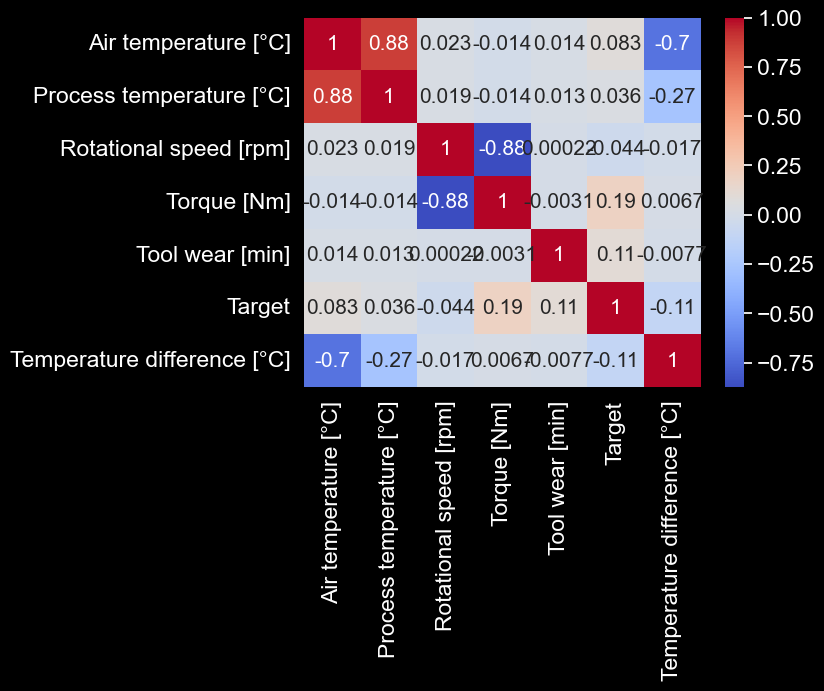

In [212]:

# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

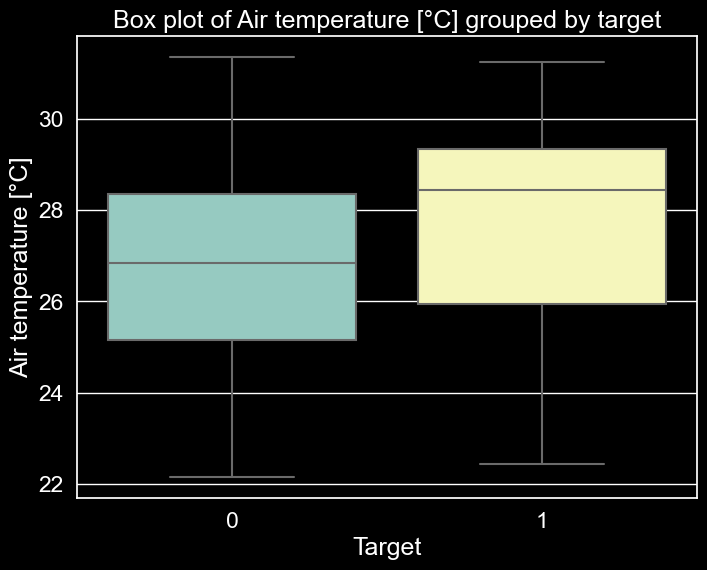

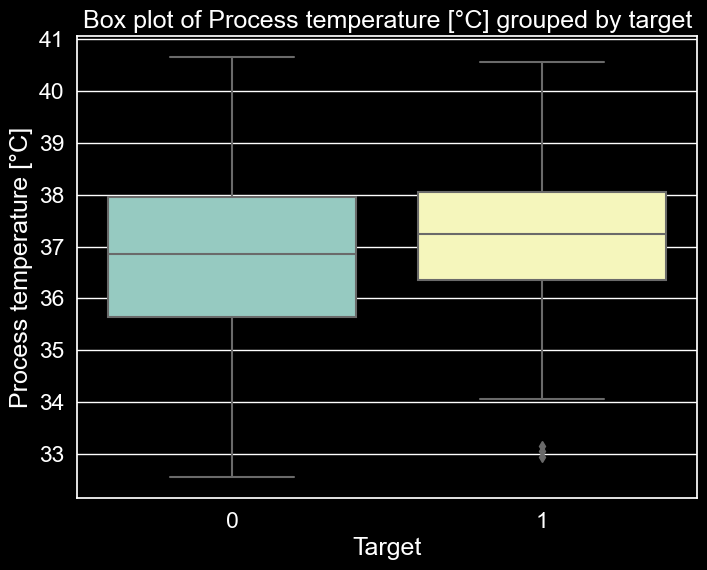

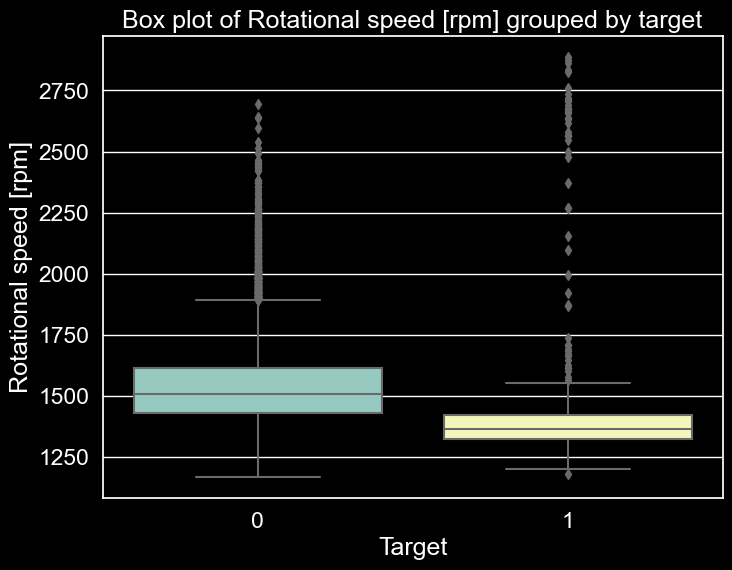

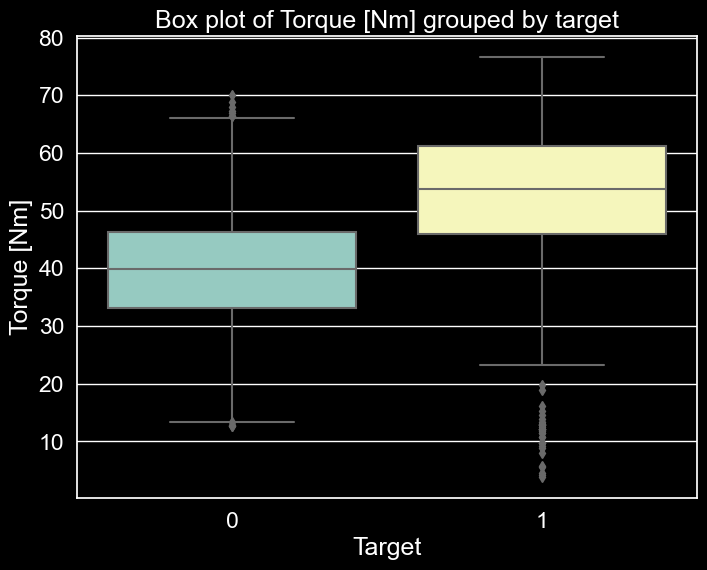

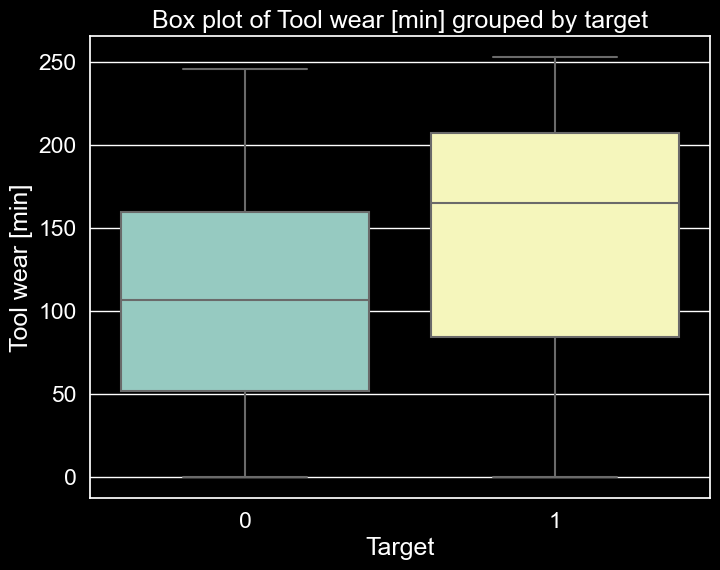

In [213]:
# Box plot of features grouped by target
for col in df.columns:
    if col != 'Target' and col != 'Failure Type' and col != 'Type' and col != 'Temperature difference [°C]':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Target', y=col, data=df)
        plt.title(f'Box plot of {col} grouped by target')
        plt.show()

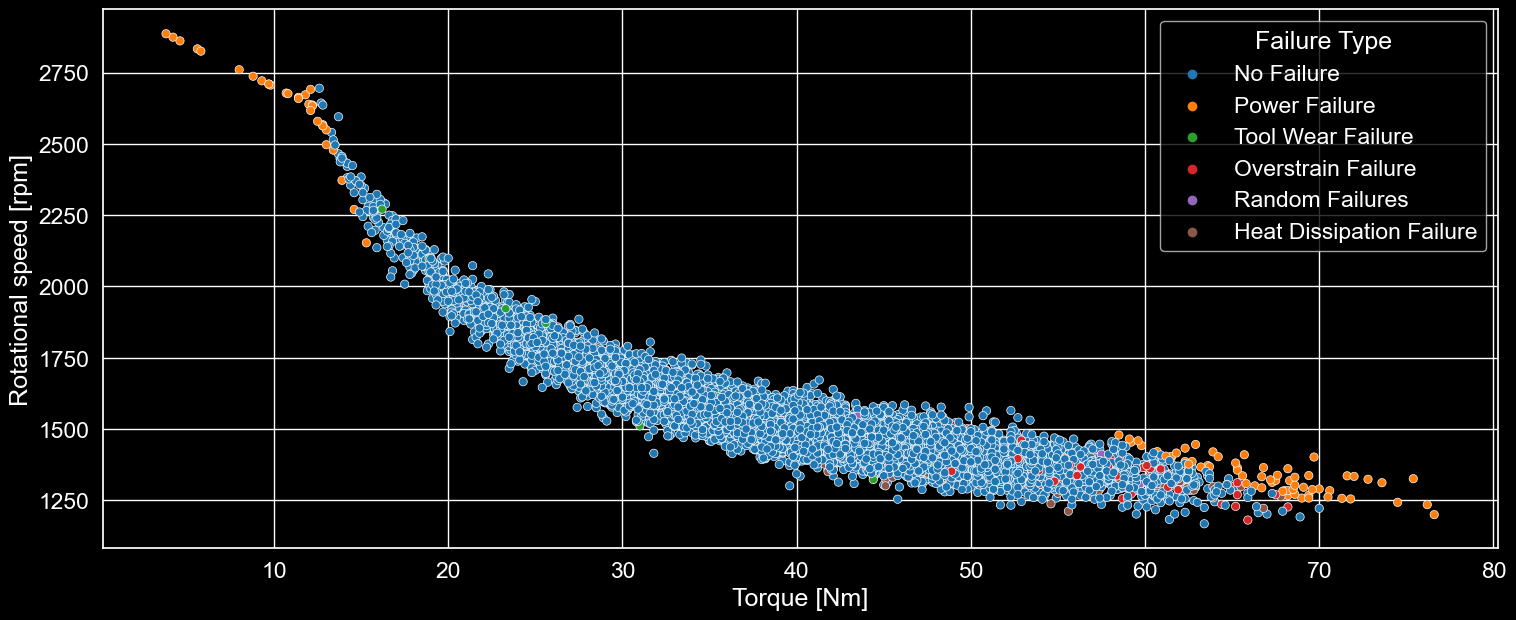

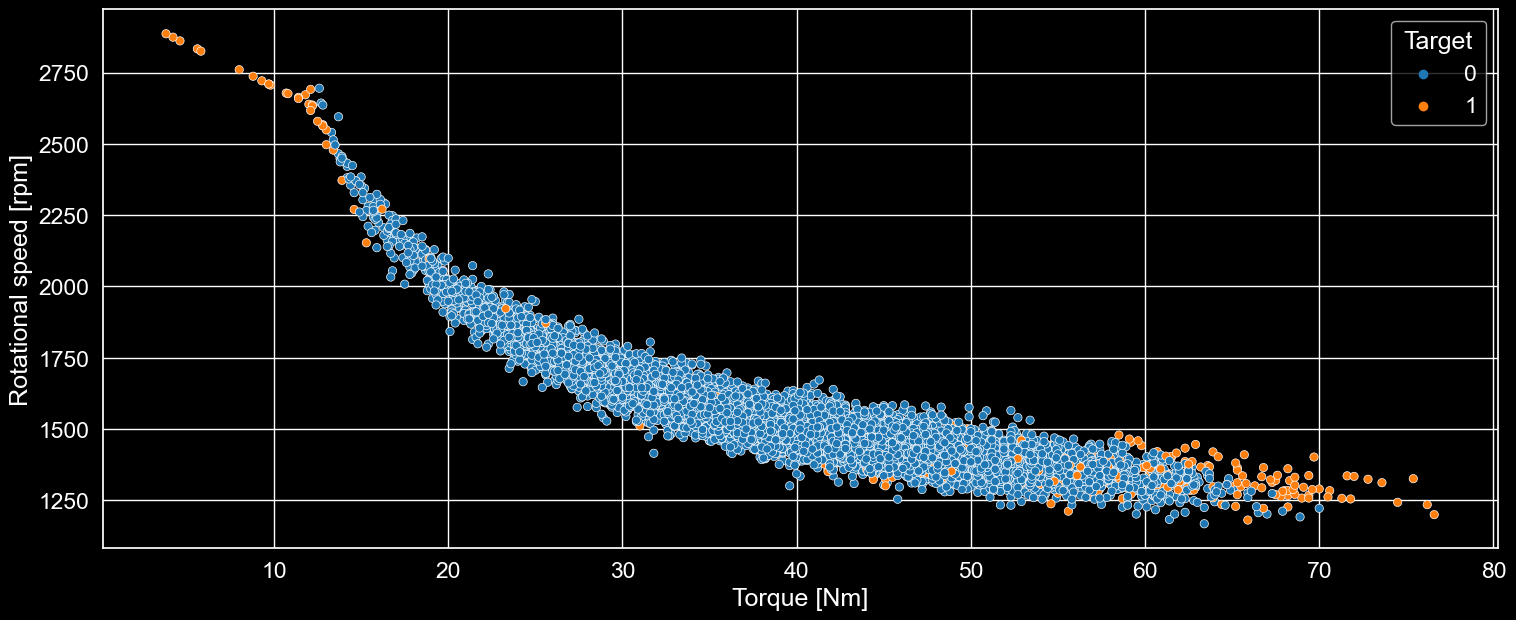

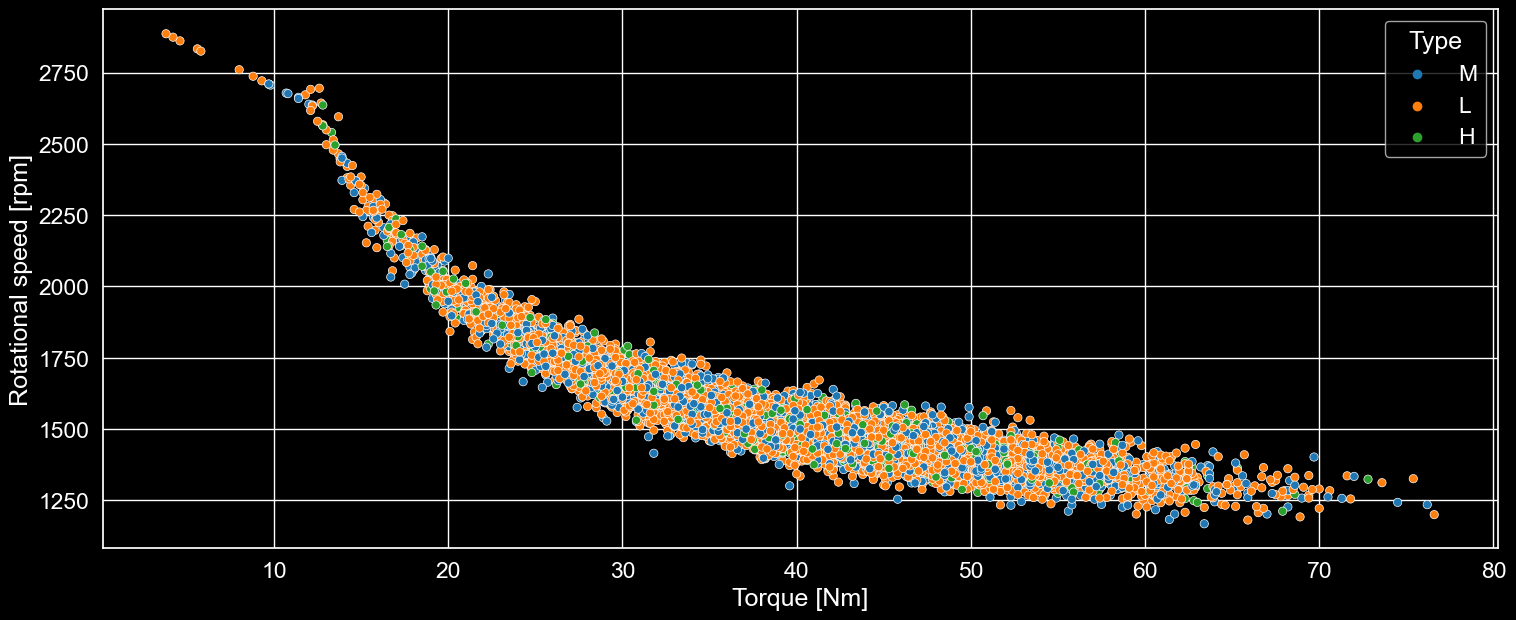

In [214]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

In [215]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Air temperature [°C]', 'Process temperature [°C]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
# Assuming 'numerical_cols' is a list of numerical column names
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

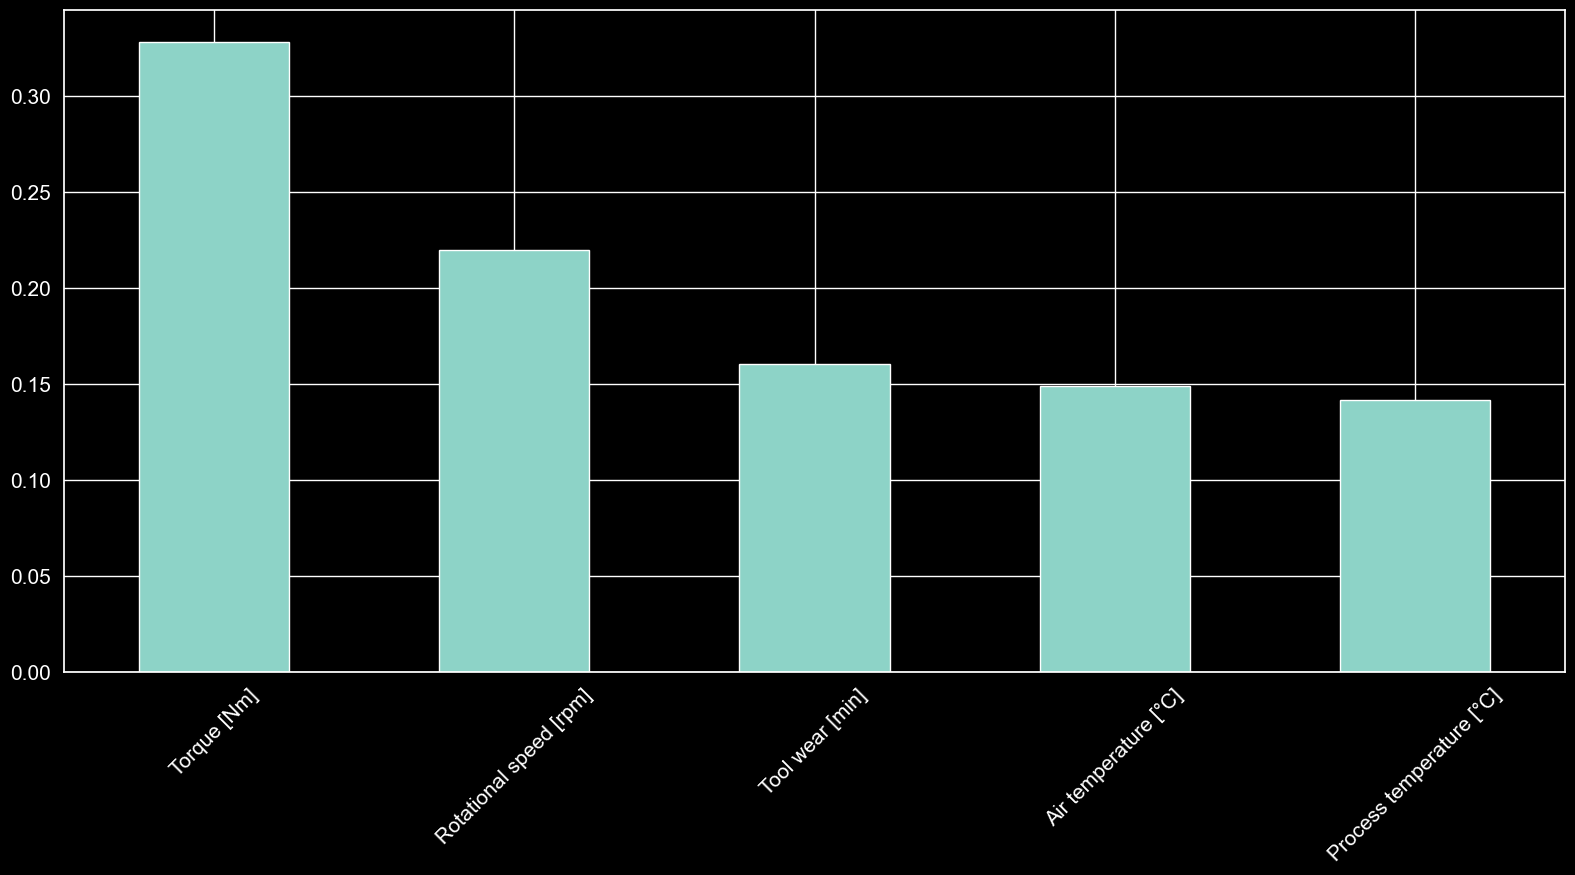

In [216]:
from sklearn.ensemble import RandomForestClassifier


X = df.drop(['Target', 'Failure Type', 'Type', 'Temperature difference [°C]'], axis=1)
y = df['Target']

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

**Logistic Regression**

Training Accuracy    : 96.56 %
Model Accuracy Score : 96.8 %
****************************************************************
Classification_Report: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.00      0.00      0.00        15
              No Failure       0.97      1.00      0.98      1935
      Overstrain Failure       0.33      0.15      0.21        13
           Power Failure       0.00      0.00      0.00        20
         Random Failures       0.00      0.00      0.00         6
       Tool Wear Failure       0.00      0.00      0.00        11

                accuracy                           0.97      2000
               macro avg       0.22      0.19      0.20      2000
            weighted avg       0.94      0.97      0.95      2000

****************************************************************


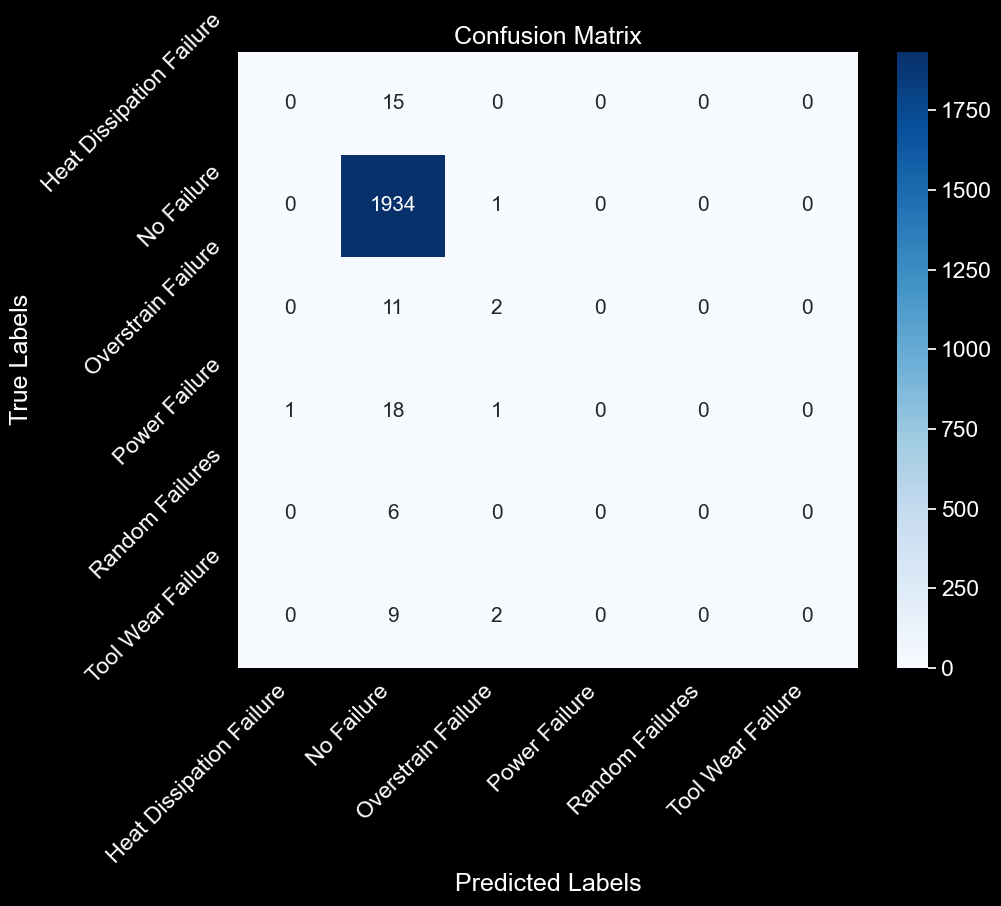

In [217]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Initialize and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lr = logreg.predict(x_test)

# Calculate training and test accuracy
log_train = round(logreg.score(x_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)

# Print accuracy scores
print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("****"*16)

# Print classification report
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("****"*16)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
# Generate confusion matrix manually
cm = confusion_matrix(y_test, y_pred_lr)
class_names = ["Heat Dissipation Failure", "No Failure", "Overstrain Failure", "Power Failure", "Random Failures", "Tool Wear Failure"]

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.show()

**Decision Tree**

Training Accuracy    : 100.0 %
Model Accuracy Score : 96.9 %
****************************************************************
Classification_Report: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.88      1.00      0.94        15
              No Failure       0.99      0.98      0.98      1935
      Overstrain Failure       0.40      0.46      0.43        13
           Power Failure       0.73      0.80      0.76        20
         Random Failures       0.00      0.00      0.00         6
       Tool Wear Failure       0.05      0.09      0.07        11

                accuracy                           0.97      2000
               macro avg       0.51      0.56      0.53      2000
            weighted avg       0.97      0.97      0.97      2000

****************************************************************


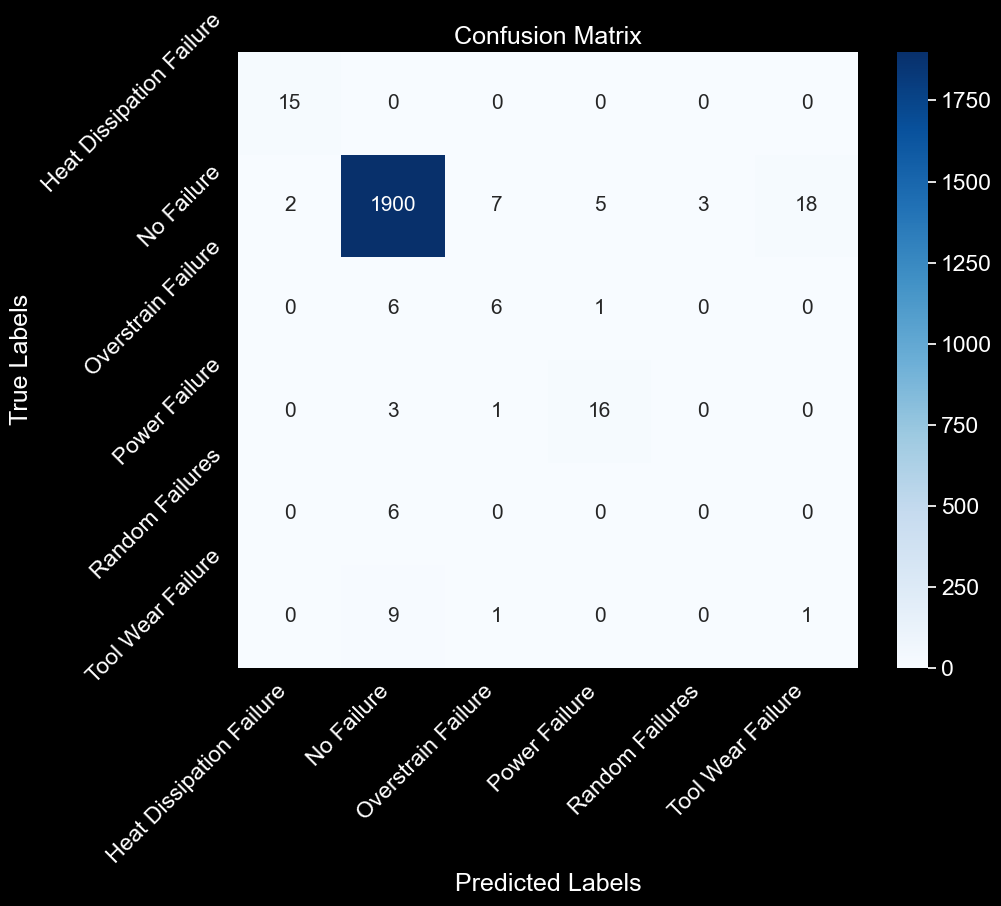

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)

# Make predictions on the test set
y_pred_dec = decision.predict(x_test)

# Calculate training and test accuracy
decision_train = round(decision.score(x_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_test, y_pred_dec) * 100, 2)

# Print accuracy scores
print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("****"*16)

# Print classification report
print("Classification_Report: \n", classification_report(y_test, y_pred_dec))
print("****"*16)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dec)

# Generate confusion matrix manually
cm = confusion_matrix(y_test, y_pred_dec)
class_names = ["Heat Dissipation Failure", "No Failure", "Overstrain Failure", "Power Failure", "Random Failures", "Tool Wear Failure"]

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.show()


**Random Forest Classifier**

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.3 %
****************************************************************
Classification_Report: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.88      1.00      0.94        15
              No Failure       0.99      1.00      0.99      1935
      Overstrain Failure       0.82      0.69      0.75        13
           Power Failure       0.78      0.70      0.74        20
         Random Failures       0.00      0.00      0.00         6
       Tool Wear Failure       0.00      0.00      0.00        11

                accuracy                           0.98      2000
               macro avg       0.58      0.56      0.57      2000
            weighted avg       0.97      0.98      0.98      2000

****************************************************************


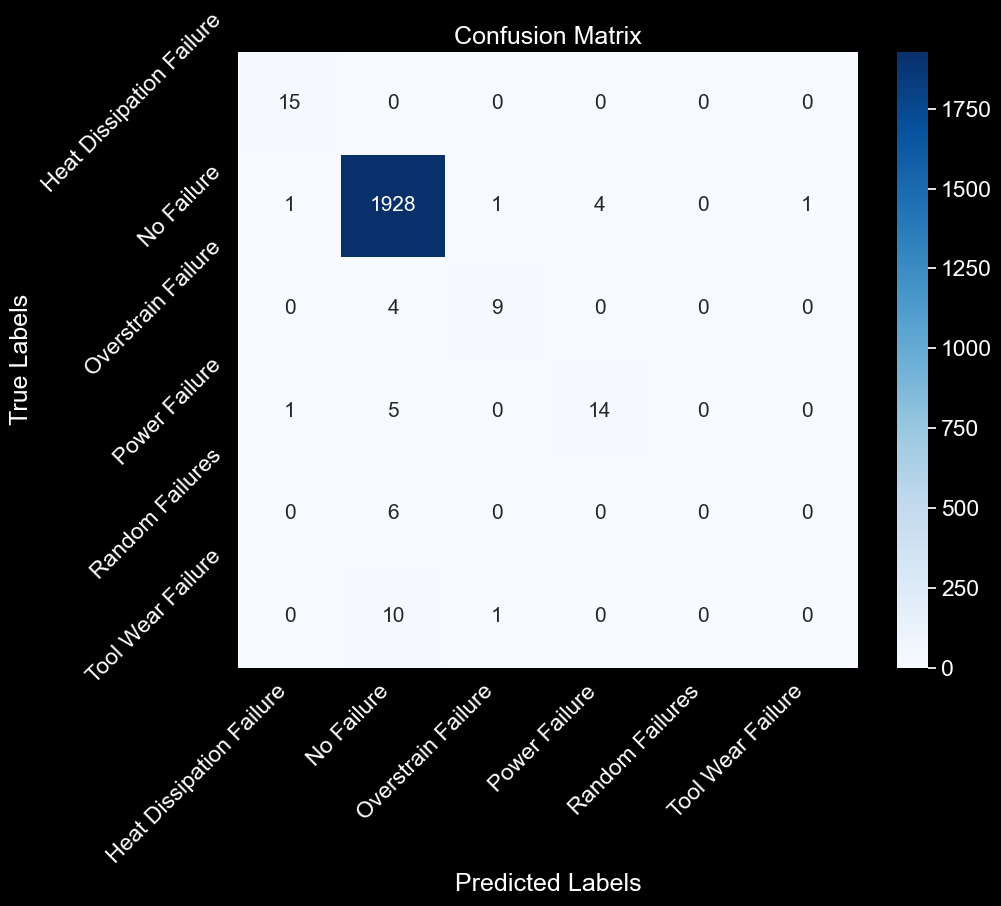

In [219]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(x_test)

# Calculate training and test accuracy
random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2)

# Print accuracy scores
print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("****"*16)

# Print classification report
print("Classification_Report: \n", classification_report(y_test, y_pred_rf))
print("****"*16)

# Generate confusion matrix manually
cm = confusion_matrix(y_test, y_pred_rf)
class_names = ["Heat Dissipation Failure", "No Failure", "Overstrain Failure", "Power Failure", "Random Failures", "Tool Wear Failure"]

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.show()



**SVM**

Training Accuracy    : 96.52 %
Model Accuracy Score : 96.8 %
****************************************************************
Classification_Report: 
                           precision    recall  f1-score   support

Heat Dissipation Failure       0.00      0.00      0.00        15
              No Failure       0.97      1.00      0.98      1935
      Overstrain Failure       0.00      0.00      0.00        13
           Power Failure       1.00      0.05      0.10        20
         Random Failures       0.00      0.00      0.00         6
       Tool Wear Failure       0.00      0.00      0.00        11

                accuracy                           0.97      2000
               macro avg       0.33      0.18      0.18      2000
            weighted avg       0.95      0.97      0.95      2000

****************************************************************


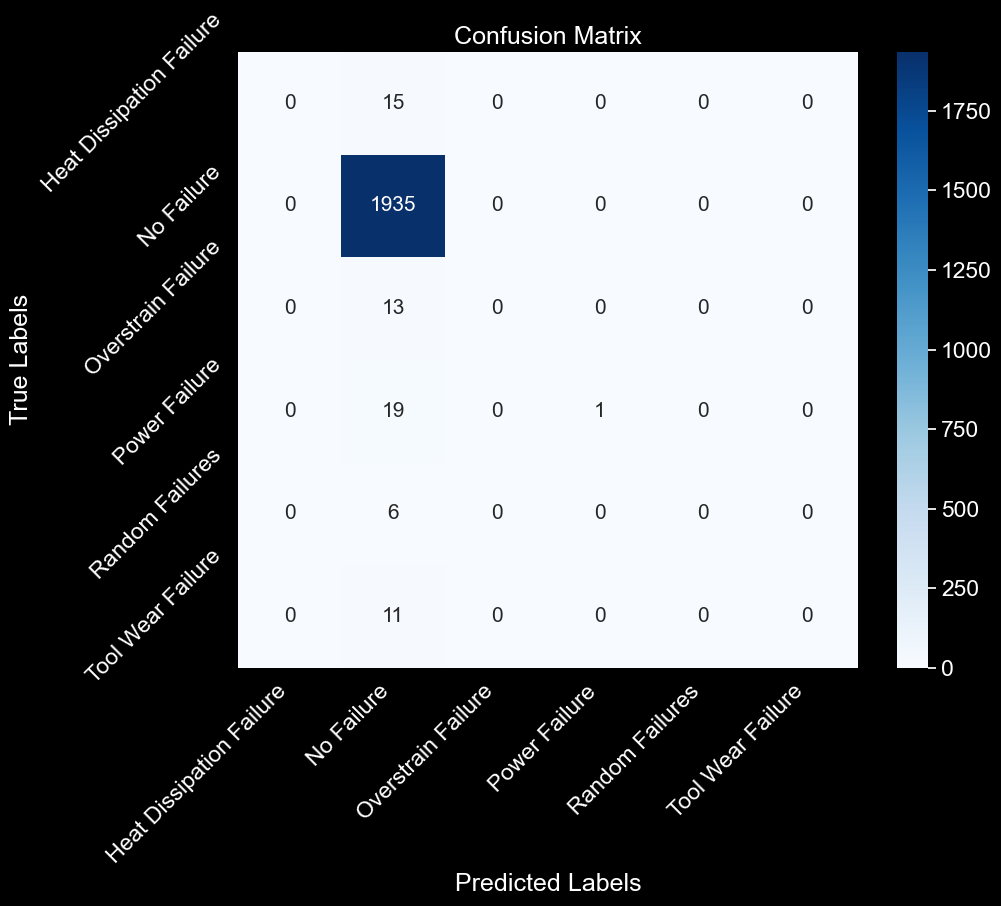

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

# Assuming x_train, y_train, x_test, y_test are already defined and preprocessed

# Initialize and train the SVM model
svc = SVC()
svc.fit(x_train, y_train)

# Make predictions on the test set
y_pred_svc = svc.predict(x_test)

# Calculate training and test accuracy
svc_train = round(svc.score(x_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc) * 100, 2)

# Print accuracy scores
print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("****"*16)

# Print classification report
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))
print("****"*16)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Define class names
class_names = ["Heat Dissipation Failure", "No Failure", "Overstrain Failure", "Power Failure", "Random Failures", "Tool Wear Failure"]

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.show()


In [221]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})
pd.set_option('display.precision', 2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='copper').hide_index().set_properties(**{
            'font-family': 'Arial',
            'color': 'white',
            'font-size': '15px'
        })


Model,Training Accuracy,Model Accuracy Score
Decision Tree,100.000000,98.300000
Random Forest,100.000000,96.900000
Support Vector Machines,96.560000,96.800000
Logistic Regression,96.520000,96.800000


In [226]:
prediction1 = random_forest.predict(x_test)

cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(10).style.background_gradient(
        cmap='copper').set_properties(**{
            'font-family': 'Arial',
            'color': 'White',
            'font-size': '15px'
        })

,Actual,Predicted
5651,No Failure,No Failure
9342,No Failure,No Failure
3057,No Failure,No Failure
5502,No Failure,No Failure
2956,No Failure,No Failure
9084,Power Failure,Power Failure
7162,No Failure,No Failure
3194,No Failure,No Failure
4698,No Failure,No Failure
1109,No Failure,No Failure
